In [3]:
import pandas as pd
from src.core.Processing import Processing
from src.core.Analyser import Analyser
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from src.core.Model import Model
from src.core.ComputeModel import ComputeModel
%load_ext autoreload
%autoreload 2

In [2]:
file_path="/home/khaldi/Documents/data_app_machine/whole_data.csv"
sep=","

In [3]:
df=pd.read_csv(file_path,sep=sep)

In [4]:
outcome="Attrition"
positive_mod="Yes"

In [5]:
process=pro.Processing()

In [6]:
process.summary(df)

{'Missing Values': EmployeeID                  0
 JobInvolvement              0
 PerformanceRating           0
 EnvironmentSatisfaction    25
 JobSatisfaction            20
 WorkLifeBalance            38
 Age                         0
 Attrition                   0
 BusinessTravel              0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 Gender                      0
 JobLevel                    0
 JobRole                     0
 MaritalStatus               0
 MonthlyIncome               0
 NumCompaniesWorked         19
 Over18                      0
 PercentSalaryHike           0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           9
 TrainingTimesLastYear       0
 YearsAtCompany              0
 YearsSinceLastPromotion     0
 YearsWithCurrManager        0
 dtype: int64,
 'Constant Features': ['EmployeeCount', 'Over18', 'StandardHours']}

they are NaN on different columns and constants features, we are going to impute NaN values
and remove constant features

In [7]:
df=process.preprocessing(df,method="drop")
df=process.remove_outliers(df)
df=process.remove_constant_features(df)

In [8]:
a=Analyser()

<BarContainer object of 2 artists>

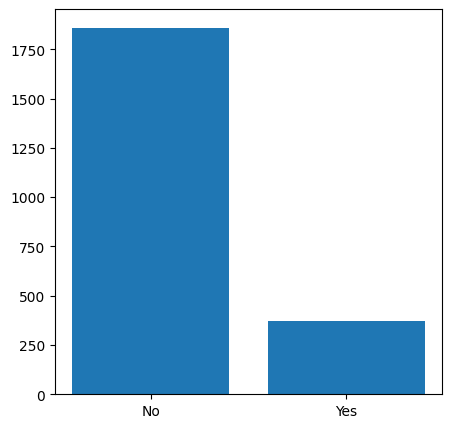

In [9]:
fig,ax=plt.subplots(figsize=(5,5))
a.bar_chart(df,outcome,ax)

On voit que les modalités de l'outcome ne sont equilibrés: il faut faire un oversampling et/ou undersampling

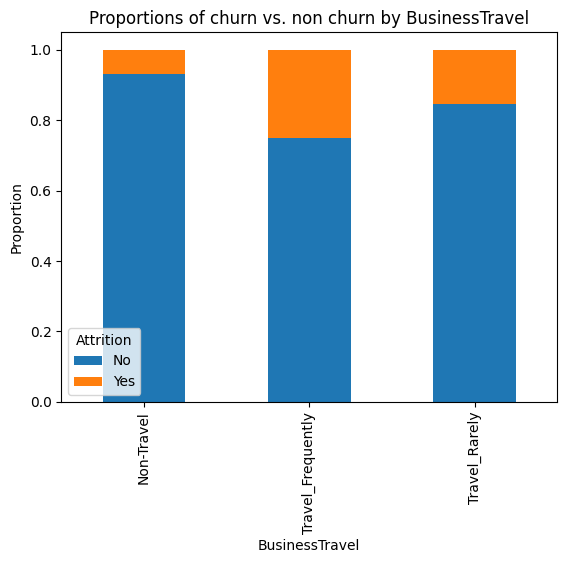

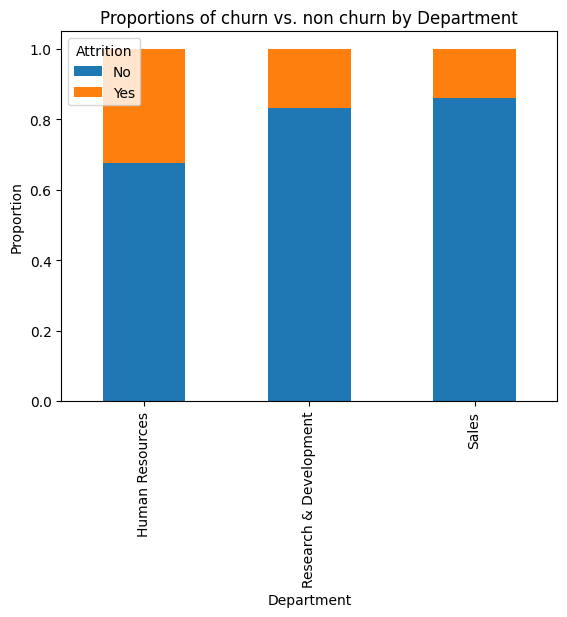

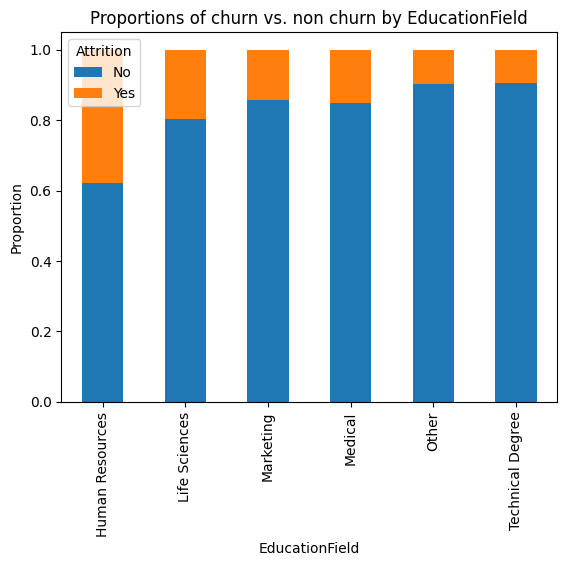

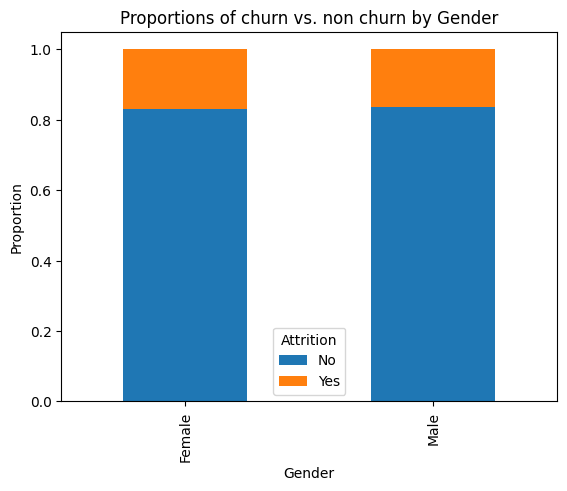

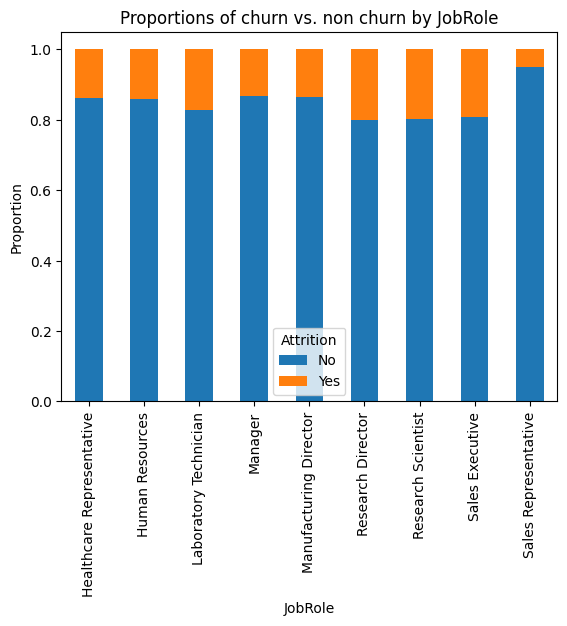

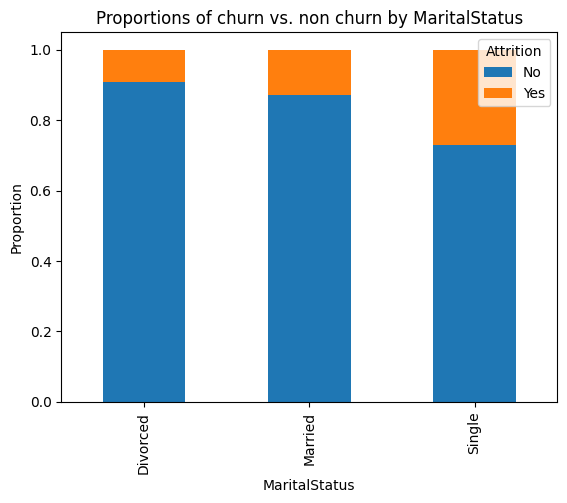

In [10]:
summary=a.summary(df)
qualit_who_outcome=[c for c in summary["features"]["qualitative_features"] if c != outcome]
for i in range(len(qualit_who_outcome)):
    a.prop_churn_by_cats(df,outcome,qualit_who_outcome[i])
plt.show()

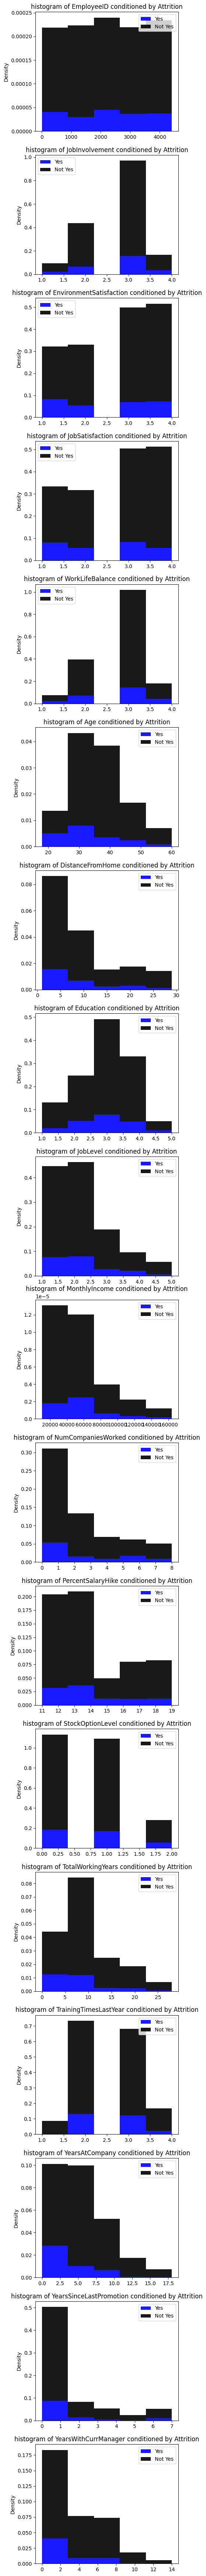

In [11]:
summary=a.summary(df)
quanti=summary["features"]["quantitative_features"]
fig,axs=plt.subplots(nrows=len(quanti),figsize=(5,5*len(quanti)))
for i in range(len(quanti)):
    a.prop_churn_by_numerical_hist(df,outcome,positive_mod,quanti[i],axs[i],alpha=0.9,density=True)
plt.show()

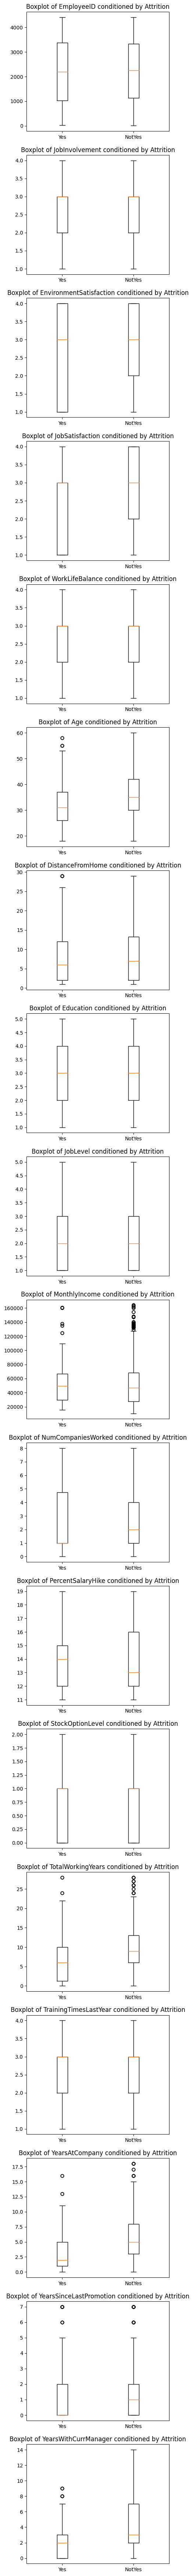

In [12]:
summary=a.summary(df)
quanti=summary["features"]["quantitative_features"]
fig,axs=plt.subplots(nrows=len(quanti),figsize=(5,5*len(quanti)))
for i in range(len(quanti)):
    a.prop_churn_by_numerical_boxplot(df,outcome,positive_mod,quanti[i],axs[i])
plt.show()

In [13]:
process.summary(df)

{'Missing Values': EmployeeID                 0
 JobInvolvement             0
 EnvironmentSatisfaction    0
 JobSatisfaction            0
 WorkLifeBalance            0
 Age                        0
 Attrition                  0
 BusinessTravel             0
 Department                 0
 DistanceFromHome           0
 Education                  0
 EducationField             0
 Gender                     0
 JobLevel                   0
 JobRole                    0
 MaritalStatus              0
 MonthlyIncome              0
 NumCompaniesWorked         0
 PercentSalaryHike          0
 StockOptionLevel           0
 TotalWorkingYears          0
 TrainingTimesLastYear      0
 YearsAtCompany             0
 YearsSinceLastPromotion    0
 YearsWithCurrManager       0
 dtype: int64,
 'Constant Features': []}

/home/khaldi/Documents/master_mlsd/app_machine/Analyser.py:78: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df_c.corr()


<Axes: >

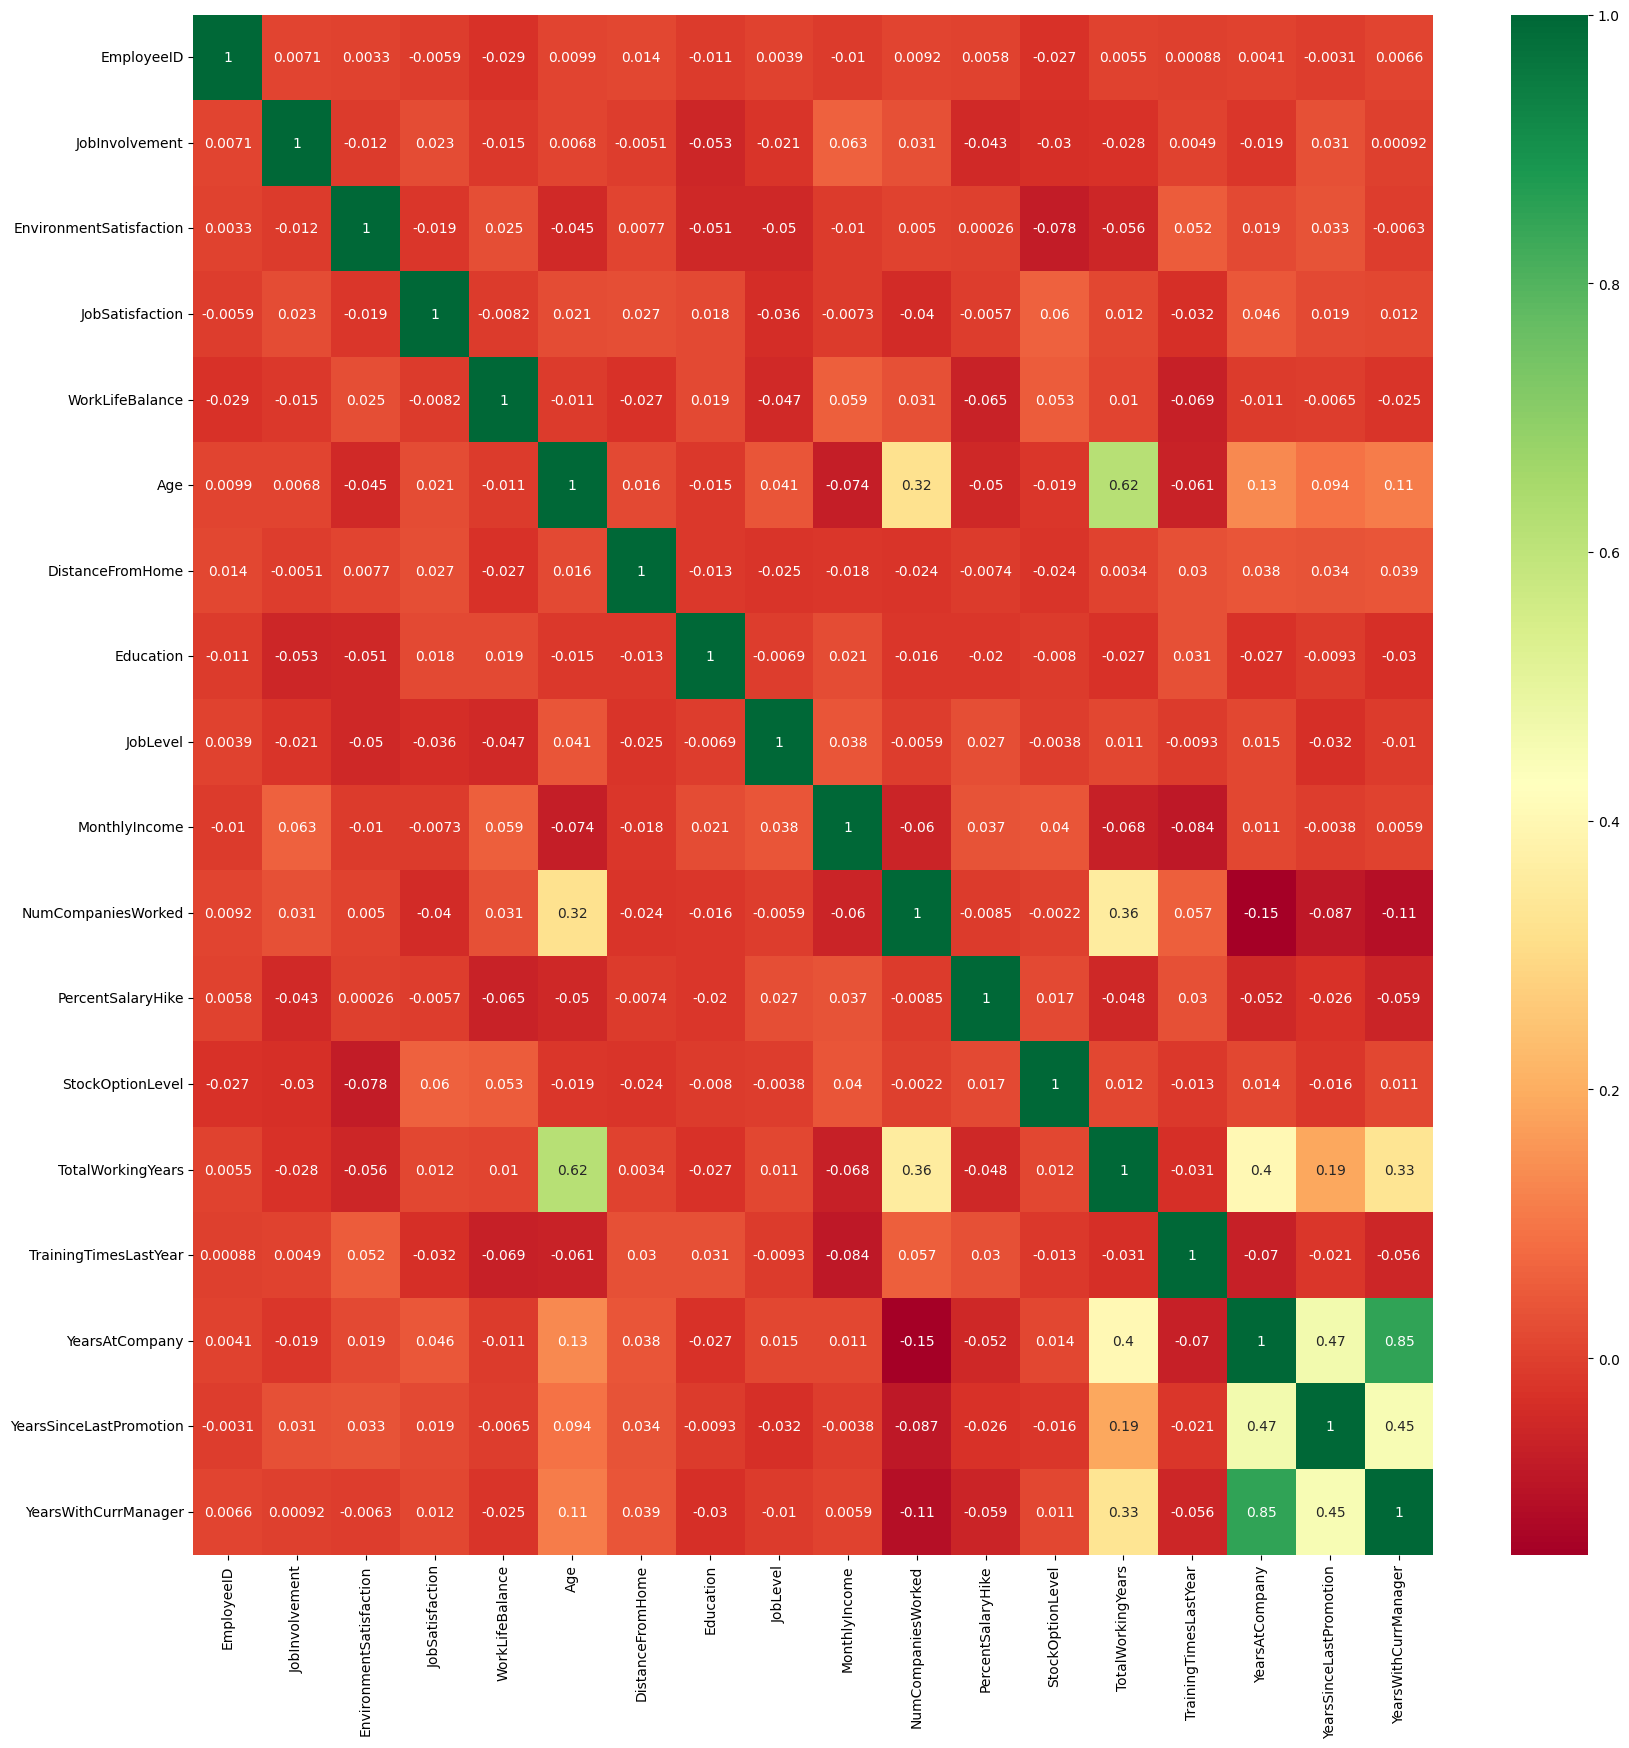

In [14]:
plt.figure(figsize=(20,20))
a.correlation_heatmap(df,annot=True)

On regard des graphiques, on peut observer que certaines features sont plus liés à l'outcome que d'autres

In [15]:
relevant_features=["Department","JobRole","MaritalStatus","BusinessTravel","JobSatisfaction","WorkLifeBalance","Age","NumCompaniesWorked","TotalWorkingYears"]
df_new=df[relevant_features]

In [16]:
hyperparameters= {
    "penalty":"l2",
    "C":1.,
    "solver":"liblinear",
    "multi_class":"auto",
    "n_jobs":None,
    "max_iter":250
}

In [62]:
c=ComputeModel(df[relevant_features],df[outcome],"SVM",hyperparameters=None,process=process,positive_mod="Yes")

In [63]:
c.fit()

/home/khaldi/.cache/pypoetry/virtualenvs/app-machine-WNt7oxYU-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'auc': 0.7098297237198818,
 'accuracy': 0.7914798206278026,
 'precision': 0.0,
 'recall': 0.0,
 'f1_score': 0.0}

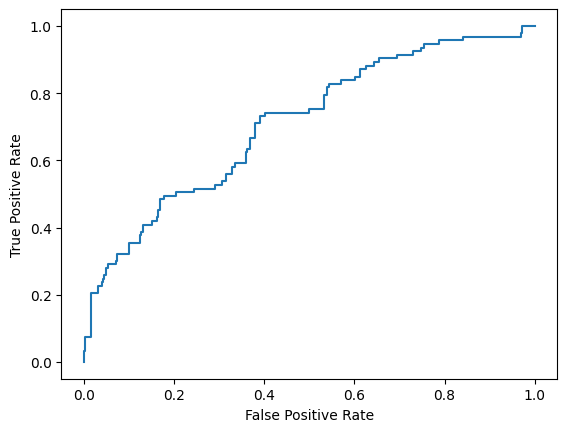

In [64]:
fig,ax=plt.subplots()
c.metrics(plot_roc=True,ax=ax)

In [65]:
from sklearn import tree
c.model.plot_model()

In [2]:
def f(x:float):
    return x

f([])

[]

In [3]:
file_path="/home/khaldi/Documents/data_app_machine/whole_data.csv"
sep=","
df=pd.read_csv(file_path,sep=sep)

NameError: name 'pd' is not defined